## Investigating How Data Scientists Answered the Stack Overflow Survey

### Background
I am investigating the 2017 Stack Overflow survey results. A brief description of the survey and the relevant files can be found on [Kaggle](https://www.kaggle.com/stackoverflow/so-survey-2017).

### Questions
Since I am taking the Data Science Nanodegree program from Udacity, I am interested in how data scientists answered the questions in this survey.  The questions I will explore are:
1. How does the mean salary for a data scientist compare to other developer types?
2. How does the mean job satisfaction for a data scientist compare to other developer types?
3. What types of education do data scientists recommend?

In [38]:
# Import packages and read in data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Look at some basic descriptive statistics...
display(df.describe())
display(df.shape)

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


(19102, 154)

There are 19,102 rows in the dataset, with each corresponding to a single respondent.  Of the 154 columns, however, there are only 6 columns that have numerical data, which means that most of the columns have categorical responses, including the column that I am interested in exploring first: 'DeveloperType'.

In [40]:
# Look at the first 10 rows of DeveloperType:
df['DeveloperType'].head(10)

0                                                  NaN
1                                                  NaN
2                                                Other
3                                                  NaN
4    Mobile developer; Graphics programming; Deskto...
5                                                  NaN
6                                                  NaN
7                                        Web developer
8                      Web developer; Mobile developer
9     Mobile developer; Desktop applications developer
Name: DeveloperType, dtype: object

Not every respondent provided a developer type, meaning that my sample size will be less than the 19,102 in the dataset.  I also see some respondents provided multiple answers, separated by semicolons, which need to be parsed out.

In [41]:
# Create a function to identify unique responses in DeveloperType
def unique_responses(df_column):
    '''
    Identifies the unique responses in a column of the Stack Overflow dataset
    
    df_column: pandas Series, the column from the pandas Dataframe to parse
    
    returns response_set, a set of the unique responses
    '''
    # Initialize the set
    response_set = set()
    
    # Loop through the column
    for response in df_column:
        # Split the response by semicolon and a space (; ) into multiple developer types
        dev_types = str(response).split('; ')
        # For each developer type in the response, add it to the set of responses
        for dev_type in dev_types:
            response_set.add(dev_type)

    return response_set

In [42]:
# View unique responses in DeveloperType
developer_responses = unique_responses(df['DeveloperType'])
developer_responses

{'Data scientist',
 'Database administrator',
 'Desktop applications developer',
 'DevOps specialist',
 'Developer with a statistics or mathematics background',
 'Embedded applications/devices developer',
 'Graphic designer',
 'Graphics programming',
 'Machine learning specialist',
 'Mobile developer',
 'Other',
 'Quality assurance engineer',
 'Systems administrator',
 'Web developer',
 'nan'}

There are 15 different unique responses to the 'DeveloperType' question, including 'Other' and 'nan' (meaning the respondent didn't answer this question).  Of the 13 possible Developer types listed, 'Data scientist' and 'Machine learning specialist' are the only two that I would consider to be in the data science realm.  I am curious how these two types compare to the rest of the types listed.  But first, I want to know how many respondents fall under each developer type.

In [43]:
# Create a dictionary of the number of responsed for each DeveloperType

# Initialize a dictionary for counting
response_dict = dict.fromkeys(developer_responses,0)
# Loop through each row of the dataframe
for response in df['DeveloperType']:
    # For each developer type in the response, increment the dictionary count by 1
    for dev_type in str(response).split('; '):
        response_dict[dev_type] += 1

response_dict

{'Data scientist': 1077,
 'Desktop applications developer': 3869,
 'Mobile developer': 2905,
 'Developer with a statistics or mathematics background': 1479,
 'Graphics programming': 584,
 'Quality assurance engineer': 429,
 'Embedded applications/devices developer': 1174,
 'Machine learning specialist': 488,
 'Database administrator': 1827,
 'Systems administrator': 1479,
 'Web developer': 10086,
 'DevOps specialist': 1505,
 'nan': 5330,
 'Graphic designer': 439,
 'Other': 996}

In [44]:
# Visualize the response dictionary in a dataframe
response_df = pd.DataFrame.from_dict(response_dict,orient='index',columns=['Count'])
response_df.sort_values(by='Count',ascending=False)

,Count
Web developer,10086
nan,5330
Desktop applications developer,3869
Mobile developer,2905
Database administrator,1827
DevOps specialist,1505
Developer with a statistics or mathematics background,1479
Systems administrator,1479
Embedded applications/devices developer,1174
Data scientist,1077


In [45]:
# Since the respondents that did not answer this question do not provide any information to help answer my questions,
# I will drop that response from my dataframe
response_df.drop(index='nan',inplace=True)

In [46]:
# Add a column to the dataframe to reflect frequency of respondents by developer type
# NOTE: This is the number of people (respondents) who included each developer type in their response
num_respondents = 19101-5330 # Total number of respondents minus 'nan's
response_df['Respondent_Freq'] = response_df['Count']/num_respondents

In [47]:
# Create a sorted dataframe for easier plotting
response_df_sorted = response_df.sort_values(by='Count',ascending=False)

# Visualize
response_df_sorted

,Count,Respondent_Freq
Web developer,10086,0.732409
Desktop applications developer,3869,0.280953
Mobile developer,2905,0.210951
Database administrator,1827,0.132670
DevOps specialist,1505,0.109288
Developer with a statistics or mathematics background,1479,0.107400
Systems administrator,1479,0.107400
Embedded applications/devices developer,1174,0.085252
Data scientist,1077,0.078208
Other,996,0.072326


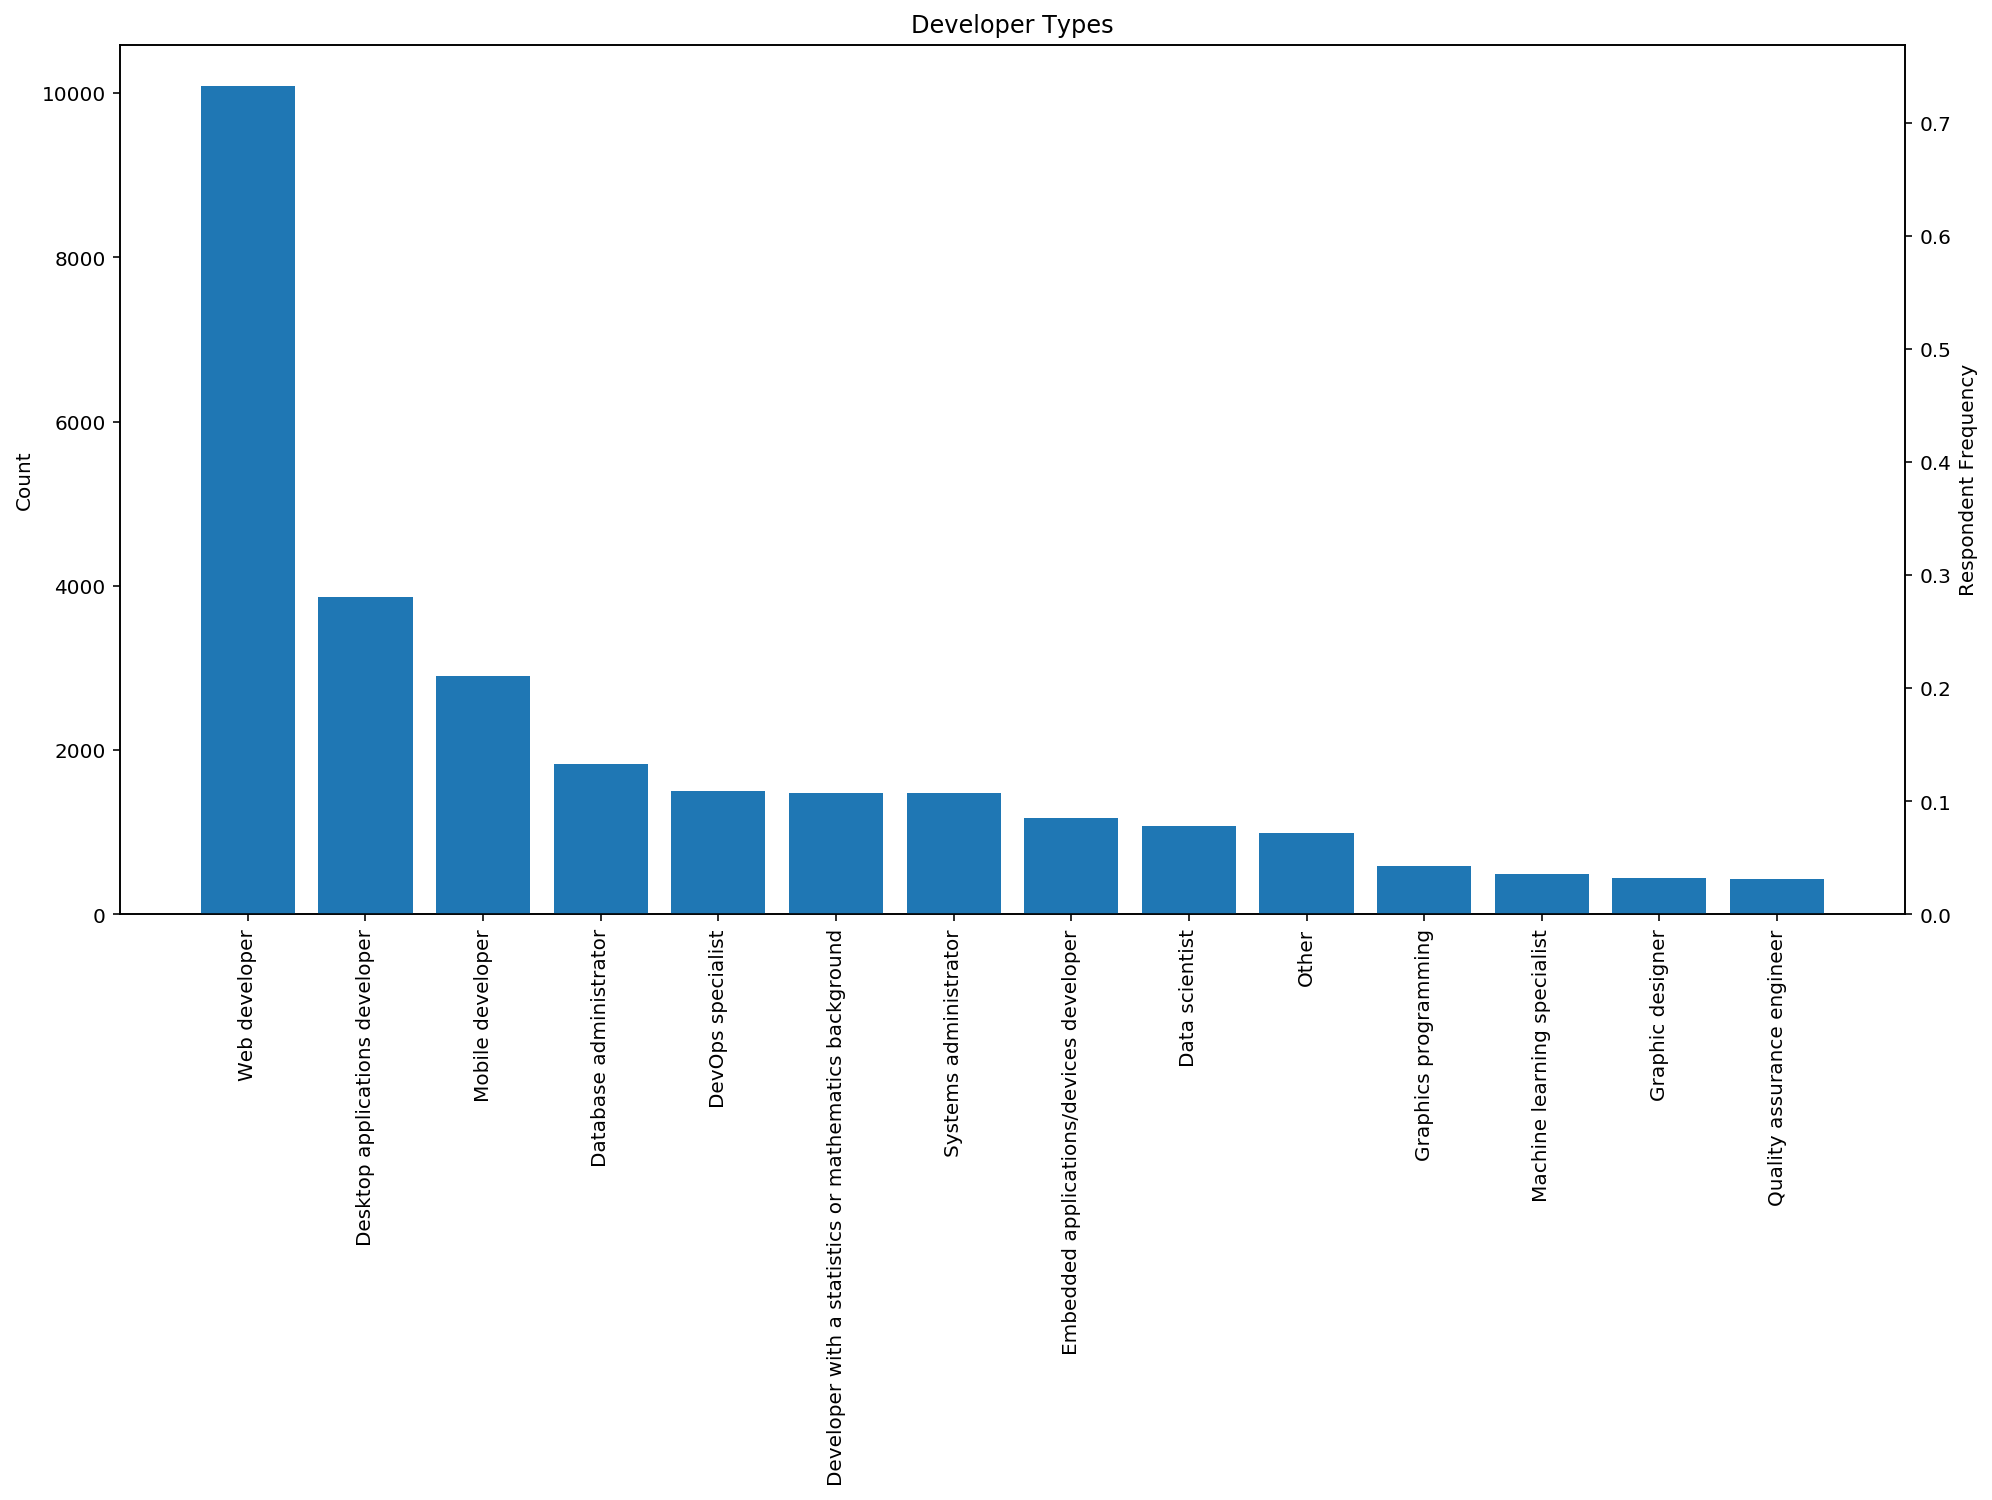

In [48]:
# Plot responses by developer type
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
ax1.bar(response_df_sorted.index,response_df_sorted['Count'])
ax2 = ax1.twinx()
ax2.bar(response_df_sorted.index,response_df_sorted['Respondent_Freq'])
ax1.set_xticklabels(response_df_sorted.index, rotation=90)
ax1.set_ylabel('Count')
ax2.set_ylabel('Respondent Frequency')
ax1.set_title('Developer Types')
plt.show()

In [49]:
num_responses = response_df_sorted['Count'].sum()
print('The number of respondents:',num_respondents)
print('The number of responses:',num_responses)
print('The average number of responses per respondent: {:.2f}'.format(num_responses/num_respondents))

The number of respondents: 13771
The number of responses: 28337
The average number of responses per respondent: 2.06


The most common response was 'Web developer' with over 10,000 responses, making up over 70% of respondents.  Data scientists made up 1077 responses (7.8% of respondents) and 'Machine learning specialists' were included in 488 responses (3.5%).  I will need to be careful when comparing the mean salary and job satisfaction for Web developers to those of data scientists and machine learning specialists since they have vastly different sample sizes.  Outliers could heavily skew the results of the developer types with small sample sizes.  Furthermore, the fact that respondents were allowed to select multiple developer types, with the average number of developer types per respondent being 2, means it is going to be difficult to isolate the effect that being a data scientist or machine learning specialist has on salary and job satisfaction.

This initial breakdown of the developer types counted each type in isolation.  Next, I need to identify which developer type(s) each respondent selected.  I will perform onehot encoding, creating 14 new columns in the dataframe to capture whether each respondent selected a particular developer type.  Pandas has a very convenient function called *get_dummies* for this process, but it will not work on the 'DeveloperType' column because it has multiple responses in a given row and the function assumes one response per row.

In [50]:
# Add new columns for the 14 responses with all rows containing 0
for column in response_df.index.to_list():
    df[column] = 0

In [51]:
# View first 5 rows of df to verify column addition
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Graphics programming,Quality assurance engineer,Embedded applications/devices developer,Machine learning specialist,Database administrator,Systems administrator,Web developer,DevOps specialist,Graphic designer,Other
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,0,0,0,0,0,0,0,0,0,0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,0,0,0,0,0,0,0,0,0,0
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,0,0,0,0,0,0,0,0,0,0
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df.loc[1,'Professional':'Country']

Professional           Student
ProgramHobby         Yes, both
Country         United Kingdom
Name: 1, dtype: object

In [112]:
# Write a function to loop through every row and assign 1's to the developer type columns included in 'DeveloperType'
def generate_onehot(df,column,separator):
    '''
    Loops through the dataframe (df) and onehot encodes the column
    This function is intended for onehot encoding a column that has multiple entries in a single column that need to be parsed
    Drops the original column
    
    df: pandas Dataframe
    column: string, the column in df to be encoded
    separator: string, the separator between multiple entries in a single row
    
    returns: df, pandas Dataframe with onehot encoded columns and without the original column
    '''
    # Copy the dataframe
    df_copy = df.copy()
    
    # Initialize the set of possible responses
    response_set = set()
    
    # Loop through the column
    for response in df_copy[column]:
        # Split the response by the separator into multiple entries
        entries = str(response).split(separator)
        # For each entry in the response, add it to the set of responses
        for entry in entries:
            response_set.add(entry)
    
    # Add new columns for the responses with all rows containing 0
    for new_column in list(response_set):
        df_copy[new_column] = 0
    
    # Loop through the rows of the dataframe
    for row in range(len(df_copy)):
        # Split the response by the separator into multiple entries
        entries = str(df_copy.loc[row,column]).split(separator)
        # Set the value in the new column equal to 1
        for entry in entries:
            df_copy.loc[row,entry] = 1
    
    # Drop the original column
    df_copy.drop(columns=column, inplace=True)
    
    return df_copy

In [ ]:
original_df = pd.read_csv('survey_results_public.csv')
test_df = original_df.loc[0:10]
test_df_copy = test_df.copy()
encoded_df = generate_onehot(test_df,'DeveloperType','; ')

In [101]:
column='DeveloperType'
for row in range(len(test_df_copy)):
    print(test_df_copy.loc[row,column])

nan
nan
Other
nan
Mobile developer; Graphics programming; Desktop applications developer
nan
nan
Web developer
Web developer; Mobile developer
Mobile developer; Desktop applications developer
nan


In [96]:
test_df.loc[0:10,'DeveloperType']

0                                                   NaN
1                                                   NaN
2                                                 Other
3                                                   NaN
4     Mobile developer; Graphics programming; Deskto...
5                                                   NaN
6                                                   NaN
7                                         Web developer
8                       Web developer; Mobile developer
9      Mobile developer; Desktop applications developer
10                                                  NaN
Name: DeveloperType, dtype: object

In [93]:
encoded_df

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,Desktop applications developer,Mobile developer,Graphics programming,Web developer,nan,0
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,Strongly agree,NaN,NaN,0,0,0,0,0,1.0
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Disagree,Strongly agree,NaN,37500.0,0,0,0,0,0,1.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Agree,113750.0,NaN,0,0,0,0,0,1.0
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Somewhat agree,Strongly agree,NaN,NaN,0,0,0,0,0,1.0
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,0,0,0,0,0,1.0
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,Agree,NaN,NaN,0,0,0,0,0,1.0
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Agree,NaN,NaN,0,0,0,0,0,1.0
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Disagree,Agree,NaN,NaN,0,0,0,0,0,1.0
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Disagree,Strongly agree,NaN,NaN,0,0,0,0,0,1.0
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Agree,NaN,NaN,0,0,0,0,0,1.0


In [85]:
str(original_df.loc[52,'DeveloperType']).split('; ')

['Web developer', 'Mobile developer', 'Quality assurance engineer']

In [78]:
display(original_df.head())
display(encoded_df.head())

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Quality assurance engineer,Embedded applications/devices developer,Machine learning specialist,Database administrator,Systems administrator,Web developer,DevOps specialist,nan,Graphic designer,0
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,0,0,0,0,0,0,0,0,0,1.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,0,0,0,0,0,0,0,0,0,1.0
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,0,0,0,0,0,0,0,0,0,1.0
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,0,0,0,0,0,0,0,0,0,1.0
